In [1]:
# Importing libraries for the practice. 

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

## I practiced for Data Merging in this file: such as merging tables with different Join Types, Concatenating, and Time series Data.
----
1. The ward data.pickle:
http://localhost:8888/notebooks/Desktop/DataCamp/Practice/Joining_Data_with_pandas.ipynb#The-ward-data.csv

2. Taxi:
http://localhost:8888/notebooks/Desktop/DataCamp/Practice/Joining_Data_with_pandas.ipynb#Taxi

3. licenses:
http://localhost:8888/notebooks/Desktop/DataCamp/Practice/Joining_Data_with_pandas.ipynb#licenses.pickle

4. Business Owner:
http://localhost:8888/notebooks/Desktop/DataCamp/Practice/Joining_Data_with_pandas.ipynb#Business_owner

5. Left/Right/Other Join: Movies
http://localhost:8888/notebooks/Desktop/DataCamp/Practice/Joining_Data_with_pandas.ipynb#Left-Join

6. Merge_ordered: Financial data
http://localhost:8888/notebooks/Desktop/DataCamp/Practice/Joining_Data_with_pandas.ipynb#Merge_Ordered()

## One-to-one relationship: 1-대-1 결과적으로 row의 양이 변하지 않음 
- Every row in the left table is related to <strong>only one</strong> row in the right table.

## One-to-many relationship: 하나가 여러개랑 연관있음.. 결과적으로 row의 양이 변함
- Every row in the left table is related to <strong>one or more</strong> row in the right table.
- Example: 1 ward can contain several zip codes, business

## Merging multiple table: 
----
df.merge(df2,on='col').merge(df3,on='col').merge(df4,on='col').merge(df5,on='col')...

# The ward data.pickle

In [2]:
wards_file= open('/Users/hyunjung/Desktop/DataCamp/data/ward.p','rb')
wards = pickle.load(wards_file)

In [3]:
print(wards.head())
print(wards.shape)

  ward            alderman                          address    zip
0    1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647
1    2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622
2    3          Pat Dowell          5046 SOUTH STATE STREET  60609
3    4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616
4    5  Leslie A. Hairston            2325 EAST 71ST STREET  60649
(50, 4)


In [4]:
census_file= open('/Users/hyunjung/Desktop/DataCamp/data/census.p','rb')
census = pickle.load(census_file)

In [5]:
print(census.head())
print(census.shape)

  ward  pop_2000  pop_2010 change                                  address  \
0    1     52951     56149     6%              2765 WEST SAINT MARY STREET   
1    2     54361     55805     3%                 WM WASTE MANAGEMENT 1500   
2    3     40385     53039    31%                      17 EAST 38TH STREET   
3    4     51953     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL   
4    5     55302     51455    -7%  JACKSON PARK LAGOON SOUTH CORNELL DRIVE   

     zip  
0  60647  
1  60622  
2  60653  
3  60653  
4  60637  
(50, 6)


In [6]:
# Merging tables: wards+ census with Inner join
# on parameter: Column or index level names to join on.
wards_census=wards.merge(census, on='ward')
print(wards_census.head())

  ward            alderman                        address_x  zip_x  pop_2000  \
0    1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647     52951   
1    2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622     54361   
2    3          Pat Dowell          5046 SOUTH STATE STREET  60609     40385   
3    4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616     51953   
4    5  Leslie A. Hairston            2325 EAST 71ST STREET  60649     55302   

   pop_2010 change                                address_y  zip_y  
0     56149     6%              2765 WEST SAINT MARY STREET  60647  
1     55805     3%                 WM WASTE MANAGEMENT 1500  60622  
2     53039    31%                      17 EAST 38TH STREET  60653  
3     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL  60653  
4     51455    -7%  JACKSON PARK LAGOON SOUTH CORNELL DRIVE  60637  


In [7]:
wards_census.columns

Index(['ward', 'alderman', 'address_x', 'zip_x', 'pop_2000', 'pop_2010',
       'change', 'address_y', 'zip_y'],
      dtype='object')

In [8]:
# Suffixes: Suffix to apply to overlapping column names in the left and righ side. Choosing name instead of _x or _y..
wards_census=wards.merge(census, on='ward', suffixes=['_ward','_cen'])
print(wards_census.columns)

Index(['ward', 'alderman', 'address_ward', 'zip_ward', 'pop_2000', 'pop_2010',
       'change', 'address_cen', 'zip_cen'],
      dtype='object')


In [9]:
sorted(wards_census.columns)

['address_cen',
 'address_ward',
 'alderman',
 'change',
 'pop_2000',
 'pop_2010',
 'ward',
 'zip_cen',
 'zip_ward']

In [10]:
wards_census.head()

,ward,alderman,address_ward,zip_ward,pop_2000,pop_2010,change,address_cen,zip_cen
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


## Taxi
---
### taxi_owners.p & taxi_veh.p

In [11]:
taxi_file = open('/Users/hyunjung/Desktop/DataCamp/data/taxi_owners.p','rb')
taxi_file2 = open('/Users/hyunjung/Desktop/DataCamp/data/taxi_vehicles.p','rb')

In [12]:
taxi_owners= pickle.load(taxi_file)
taxi_veh = pickle.load(taxi_file2)

In [13]:
taxi_owners.head()

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


In [14]:
taxi_owners.shape

(3519, 5)

In [15]:
taxi_veh.head()

,vid,make,model,year,fuel_type,owner
0,2767,TOYOTA,CAMRY,2013,HYBRID,SEYED M. BADRI
1,1411,TOYOTA,RAV4,2017,HYBRID,DESZY CORP.
2,6500,NISSAN,SENTRA,2019,GASOLINE,AGAPH CAB CORP
3,2746,TOYOTA,CAMRY,2013,HYBRID,"MIDWEST CAB CO, INC"
4,5922,TOYOTA,CAMRY,2013,HYBRID,SUMETTI CAB CO


In [16]:
taxi_veh.shape

(3519, 6)

In [17]:
# Inner join on vid column
taxi_owner_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=['_owner','_veh'])

In [18]:
taxi_owner_veh.head()

,rid,vid,owner_owner,address,zip,make,model,year,fuel_type,owner_veh
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.


In [19]:
taxi_owner_veh.shape

(3519, 10)

In [20]:
taxi_owner_veh.duplicated().sum()

0

In [21]:
taxi_owner_veh.isna().sum()

rid            0
vid            0
owner_owner    0
address        0
zip            0
make           0
model          0
year           0
fuel_type      0
owner_veh      0
dtype: int64

In [22]:
taxi_owner_veh.duplicated(subset='vid').sum()

0

In [23]:
taxi_owner_veh['fuel_type'].value_counts()

HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64

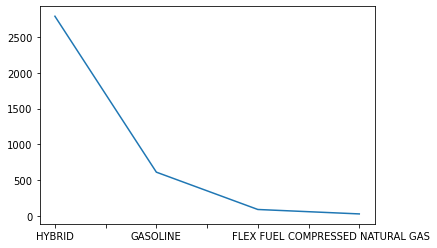

In [24]:
taxi_owner_veh['fuel_type'].value_counts().plot()

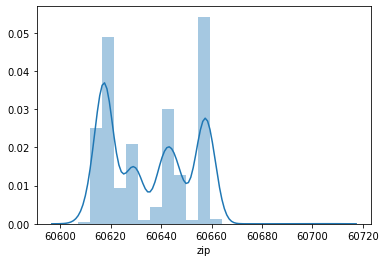

In [25]:
sns.distplot(taxi_owner_veh['zip'])

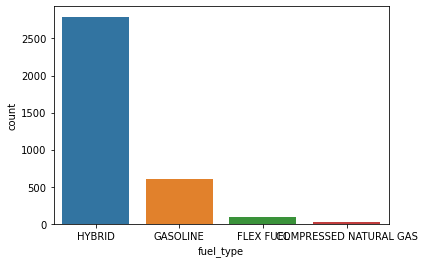

In [26]:
sns.countplot(data=taxi_owner_veh, x='fuel_type')

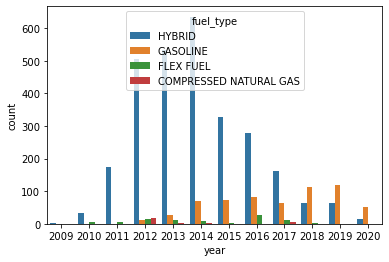

In [27]:
sns.countplot(data=taxi_owner_veh, x='year', hue='fuel_type')

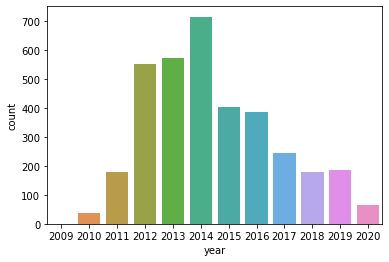

In [28]:
sns.countplot(data=taxi_owner_veh, x='year')

In [29]:
taxi_owner_veh[taxi_owner_veh['year']== taxi_owner_veh['year'].max()]

,rid,vid,owner_owner,address,zip,make,model,year,fuel_type,owner_veh
143,T1745,1745,SENEGAL TRANSIT INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2020,GASOLINE,SENEGAL TRANSIT INC.
147,T2338,2338,OLA CAB INCORPORATED,8622 S. CHAPPEL AVE.,60617,TOYOTA,SIENNA,2020,GASOLINE,OLA CAB INCORPORATED
163,T6407,6407,NAVEAD INC,9696 W. FOSTER AVE.,60656,TOYOTA,SIENNA,2020,GASOLINE,NAVEAD INC
171,T2462,2462,PARK WEST EXPRESS INC,9696 W. FOSTER AVE.,60656,TOYOTA,SIENNA,2020,GASOLINE,PARK WEST EXPRESS INC
259,T3439,3439,3439 TAXI INC,2601 W. PETERSON AVE.,60659,TOYOTA,CAMRY,2020,HYBRID,3439 TAXI INC
...,...,...,...,...,...,...,...,...,...,...
3356,T5601,5601,PIONEER TRANS INC,4118 W. LAWRENCE AVE.,60630,TOYOTA,SIENNA,2020,GASOLINE,PIONEER TRANS INC
3384,T6676,6676,ALMAHDI INC,6133 N. FRANCISCO AVE.,60659,TOYOTA,SIENNA,2020,GASOLINE,ALMAHDI INC
3407,T1682,1682,CASA BLANCA EXPRESS INC,4118 W. LAWRENCE AVE.,60630,TOYOTA,SIENNA,2020,GASOLINE,CASA BLANCA EXPRESS INC
3410,T632,632,MARS ENTERPRISE INC. II,2532 W. WARREN BLVD.,60612,TOYOTA,SIENNA,2020,GASOLINE,MARS ENTERPRISE INC. II


In [30]:
taxi_owner_veh_2020= taxi_owner_veh[taxi_owner_veh['year']== taxi_owner_veh['year'].max()]

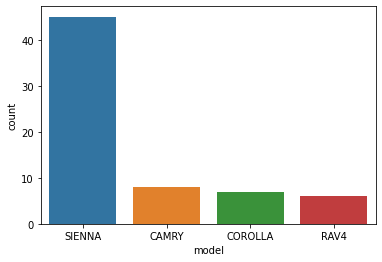

In [31]:
sns.countplot(data=taxi_owner_veh_2020,x='model')

## licenses.pickle
----

In [32]:
licenses_file= open('/Users/hyunjung/Desktop/DataCamp/data/licenses.p','rb')
licenses = pickle.load(licenses_file)
licenses.head()

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [33]:
licenses.shape

(10000, 6)

In [34]:
wards.head()

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [35]:
# Merge: wards + licenses inner join on ward

ward_licenses = wards.merge(licenses, on='ward', suffixes=['_ward','_lic'])
ward_licenses.head()

,ward,alderman,address_ward,zip_ward,account,aid,business,address_lic,zip_lic
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,12024,NaN,DIGILOG ELECTRONICS,1038 N ASHLAND AVE,60622
1,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14446,743,EMPTY BOTTLE INC,1035 N WESTERN AVE 1ST,60622
2,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE,60647
3,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14987,NaN,MR. BROWN'S LOUNGE,2301 W CHICAGO AVE 1ST,60622
4,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,15642,814,Beat Kitchen,2000-2100 W DIVISION ST,60622


In [36]:
ward_licenses.shape

(10000, 9)

## Business_owner
----

In [37]:
business_file = open('/Users/hyunjung/Desktop/DataCamp/data/business_owners.p','rb')
business = pickle.load(business_file)
business.head()

,account,first_name,last_name,title
0,10,PEARL,SHERMAN,PRESIDENT
1,10,PEARL,SHERMAN,SECRETARY
2,10002,WALTER,MROZEK,PARTNER
3,10002,CELINA,BYRDAK,PARTNER
4,10005,IRENE,ROSENFELD,PRESIDENT


In [38]:
# Merge: license + business inner join on account

license_business = licenses.merge(business, on='account', suffixes=['_lic','_biz'])
license_business.head()

,account,ward,aid,business,address,zip,first_name,last_name,title
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616,ROBERT,GLICK,MEMBER
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633,PEARL,SHERMAN,PRESIDENT
2,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633,PEARL,SHERMAN,SECRETARY
3,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632,WALTER,MROZEK,PARTNER
4,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632,CELINA,BYRDAK,PARTNER


In [39]:
license_business['ward'].dtype

dtype('O')

In [40]:
license_business['ward']= license_business['ward'].astype('category')

In [41]:
license_business.groupby('ward').agg({'zip':'count'})

,zip
ward,
1,495
10,245
11,398
12,405
13,187
14,382
15,174
16,256
17,172


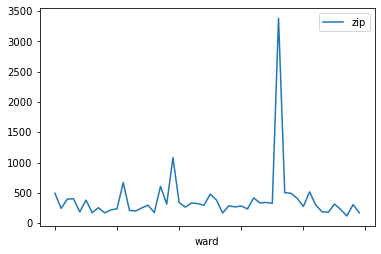

In [42]:
license_business.groupby('ward').agg({'zip':'count'}).plot()

In [43]:
license_business[license_business['ward']=='42']

,account,ward,aid,business,address,zip,first_name,last_name,title
12,10062,42,NaN,"LEVEL 3 COMMUNICATIONS, LLC",662 N HUDSON AVE,60610,KATHRYN,KINDELL,ASST. SECRETARY
13,10062,42,NaN,"LEVEL 3 COMMUNICATIONS, LLC",662 N HUDSON AVE,60610,KEN,KINNEAR,VICE PRESIDENT
14,10062,42,NaN,"LEVEL 3 COMMUNICATIONS, LLC",662 N HUDSON AVE,60610,CANDICE,CHEESEMAN,SECRETARY
15,10062,42,NaN,"LEVEL 3 COMMUNICATIONS, LLC",662 N HUDSON AVE,60610,JEFF,STOREY,PRESIDENT
16,10077,42,NaN,MITSUI & CO (U.S.A.)INC,200 E RANDOLPH ST 52ND,60601,HIROSHI,TADA,PRESIDENT
...,...,...,...,...,...,...,...,...,...
19484,86339,42,NaN,URBAN ASSETS OF ILLINOIS INC.,980 N MICHIGAN AVE 1085,60611,JORGE,GALDAMEZ,PRESIDENT
19487,86350,42,708,AMERICASH LOANS LLC,103 N WELLS ST 1ST,60606,Dustin,Mauldin,MANAGER
19488,86350,42,708,AMERICASH LOANS LLC,103 N WELLS ST 1ST,60606,ARNOLD,HORWICH,MANAGER
19489,86350,42,708,AMERICASH LOANS LLC,103 N WELLS ST 1ST,60606,STEVEN,SCHOENBERG,MANAGER


In [44]:
license_business.groupby('title').agg({'account':'count'})

,account
title,
ASST. SECRETARY,111
BENEFICIARY,4
CEO,110
DIRECTOR,146
EXECUTIVE DIRECTOR,10
GENERAL PARTNER,21
INDIVIDUAL,268
LIMITED PARTNER,26
MANAGER,134


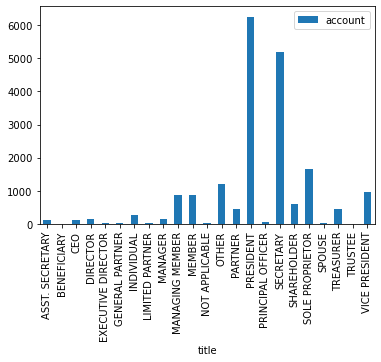

In [45]:
license_business.groupby('title').agg({'account':'count'}).plot(kind='bar')

In [46]:
license_business.sort_values(by='account')

,account,ward,aid,business,address,zip,first_name,last_name,title
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633,PEARL,SHERMAN,PRESIDENT
2,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633,PEARL,SHERMAN,SECRETARY
3,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632,WALTER,MROZEK,PARTNER
4,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632,CELINA,BYRDAK,PARTNER
5,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609,IRENE,ROSENFELD,PRESIDENT
...,...,...,...,...,...,...,...,...,...
19493,86355,43,638,VOSGES HAUT-CHOCOLAT,951 W ARMITAGE AVE 1,60614,KATRINA,MARKOFF,PRESIDENT
19492,86355,43,638,VOSGES HAUT-CHOCOLAT,951 W ARMITAGE AVE 1,60614,KATRINA,MARKOFF,SECRETARY
19494,86355,43,638,VOSGES HAUT-CHOCOLAT,951 W ARMITAGE AVE 1,60614,NaN,NaN,SHAREHOLDER
19495,86373,20,775,ALMUFLIHI FOOD & LIQUOR,5400-5404 S HALSTED ST 1ST,60609,ABDELFATTAH,HAMMAD,PRESIDENT


In [47]:
wards.head()

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [48]:
licenses.head()

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [49]:
business.head()

,account,first_name,last_name,title
0,10,PEARL,SHERMAN,PRESIDENT
1,10,PEARL,SHERMAN,SECRETARY
2,10002,WALTER,MROZEK,PARTNER
3,10002,CELINA,BYRDAK,PARTNER
4,10005,IRENE,ROSENFELD,PRESIDENT


In [50]:
# merging multiple tables: licenses +wards+ business 

licenses_ward_business = licenses.merge(wards, on=['ward'], suffixes=['_lic','_ward']).merge(business, on=['account'], suffixes=['_lic','_biz'])
licenses_ward_business.head()

,account,ward,aid,business,address_lic,zip_lic,alderman,address_ward,zip_ward,first_name,last_name,title
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616,Pat Dowell,5046 SOUTH STATE STREET,60609,ROBERT,GLICK,MEMBER
1,11280,3,763,PRIME WAY,2251 S STATE ST 1ST,60616,Pat Dowell,5046 SOUTH STATE STREET,60609,Elias,Fino,PRESIDENT
2,11280,3,763,PRIME WAY,2251 S STATE ST 1ST,60616,Pat Dowell,5046 SOUTH STATE STREET,60609,Af Af,Fino,SECRETARY
3,11671,3,775,ALWARSI INC,5458 S WELLS ST,60609,Pat Dowell,5046 SOUTH STATE STREET,60609,MOHAMMAD,AMLANI,PRESIDENT
4,11671,3,775,ALWARSI INC,5458 S WELLS ST,60609,Pat Dowell,5046 SOUTH STATE STREET,60609,IQBAL,MOHAMMAD,SECRETARY


In [51]:
licenses_ward_business.shape

(19497, 12)

In [52]:
licenses_ward_business.groupby('ward')['aid'].count()

ward
1      279
10     112
11     173
12     162
13      98
14     180
15      95
16     118
17      80
18     106
19     117
2      412
20      80
21      92
22     102
23     130
24      94
25     315
26     137
27     607
28     159
29     119
3      193
30     148
31     113
32     258
33     197
34      82
35     151
36     139
37     133
38     111
39     156
4      226
40     178
41     146
42    1594
43     321
44     351
45     179
46     161
47     267
48     154
49     106
5       87
50     150
6      101
7       59
8      115
9       72
Name: aid, dtype: int64

In [53]:
licenses_ward_business.columns

Index(['account', 'ward', 'aid', 'business', 'address_lic', 'zip_lic',
       'alderman', 'address_ward', 'zip_ward', 'first_name', 'last_name',
       'title'],
      dtype='object')

In [54]:
licenses_ward_business['alderman'].value_counts()

Brendan Reilly               3383
Walter Burnett, Jr.          1082
Brian Hopkins                 671
Daniel "Danny" Solis          608
Ameya Pawar                   517
Michelle Smith                504
Proco "Joe" Moreno            495
Tom Tunney                    494
Scott Waguespack              481
Margaret Laurino              418
John S. Arena                 412
George Cardenas               405
Patrick Daley Thompson        398
Deborah Mell                  384
Edward M. Burke               382
Patrick J. O'Connor           343
Jason C. Ervin                341
William D. Burns              336
Pat Dowell                    335
Anthony V. Napolitano         330
Ariel E. Reyboras             324
Debra L. Silverstein          317
Roberto Maldonado             317
Michelle A. Harris            308
Harry Osterman                299
Michael R. Zalewski           298
Milagros "Milly" Santiago     296
Carlos Ramirez-Rosa           288
Emma M. Mitts                 285
James Capplema

## Movie data
----

### Left Join: 
---
- Left table: [[A2,B2,C2],[A3,B3,C3]]
- Right table: [[C1,D1],[C2,D2],[C4,D4],[C5,D5]]
- Left + Right = [[A2,B2,C2,D2],[A3,B3,C3,np.nan]]
- Left side 다 남고 겹쳐지지 않는 Right side는 소멸됨

In [55]:
movie_file = open('/Users/hyunjung/Desktop/DataCamp/data/movies.p','rb')
movies = pickle.load(movie_file)
movies.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [56]:
movies.shape

(4803, 4)

In [57]:
tagline_file = open('/Users/hyunjung/Desktop/DataCamp/data/taglines.p','rb')
taglines = pickle.load(tagline_file)
taglines.head()

,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."


In [58]:
taglines.shape

(3955, 2)

In [59]:
movies_taglines = movies.merge(taglines, on='id', how='left')
movies_taglines.head()

,id,title,popularity,release_date,tagline
0,257,Oliver Twist,20.415572,2005-09-23,NaN
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,Never underestimate an overachiever.
2,38365,Grown Ups,38.864027,2010-06-24,Boys will be boys. . . some longer than others.
3,9672,Infamous,3.680896,2006-11-16,There's more to the story than you know
4,12819,Alpha and Omega,12.300789,2010-09-17,A Pawsome 3D Adventure


In [60]:
# row numbers on the left join : Following number of rows in left table.
movies_taglines.shape

(4803, 5)

In [61]:
financials_file = open('/Users/hyunjung/Desktop/DataCamp/data/financials.p','rb')
financials = pickle.load(financials_file)
financials.head()

,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08


In [62]:
financials.shape

(3229, 3)

In [63]:
movies_financials = movies.merge(financials, on='id', how='left')
movies_financials.head()

,id,title,popularity,release_date,budget,revenue
0,257,Oliver Twist,20.415572,2005-09-23,50000000.0,42093706.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,NaN,NaN
2,38365,Grown Ups,38.864027,2010-06-24,80000000.0,271430189.0
3,9672,Infamous,3.680896,2006-11-16,13000000.0,1151330.0
4,12819,Alpha and Omega,12.300789,2010-09-17,20000000.0,39300000.0


In [64]:
movies_financials_taglines = movies_financials.merge(taglines, on='id', how='left')

In [65]:
movies_financials_taglines.head()

,id,title,popularity,release_date,budget,revenue,tagline
0,257,Oliver Twist,20.415572,2005-09-23,50000000.0,42093706.0,NaN
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,NaN,NaN,Never underestimate an overachiever.
2,38365,Grown Ups,38.864027,2010-06-24,80000000.0,271430189.0,Boys will be boys. . . some longer than others.
3,9672,Infamous,3.680896,2006-11-16,13000000.0,1151330.0,There's more to the story than you know
4,12819,Alpha and Omega,12.300789,2010-09-17,20000000.0,39300000.0,A Pawsome 3D Adventure


In [66]:
movies_financials_taglines.sort_values(by='id')

,id,title,popularity,release_date,budget,revenue,tagline
2375,5,Four Rooms,22.876230,1995-12-09,4000000.0,4300000.0,Twelve outrageous guests. Four scandalous requ...
1183,11,Star Wars,126.393695,1977-05-25,11000000.0,775398007.0,"A long time ago in a galaxy far, far away..."
709,12,Finding Nemo,85.688789,2003-05-30,94000000.0,940335536.0,"There are 3.7 trillion fish in the ocean, they..."
2733,13,Forrest Gump,138.133331,1994-07-06,55000000.0,677945399.0,"The world will never be the same, once you've ..."
1919,14,American Beauty,80.878605,1999-09-15,15000000.0,356296601.0,Look closer.
...,...,...,...,...,...,...,...
969,426067,Midnight Cabaret,0.001389,1990-01-01,NaN,NaN,The hot spot where Satan's waitin'.
3019,426469,Growing Up Smith,0.710870,2017-02-03,NaN,NaN,It’s better to stand out than to fit in.
1665,433715,8 Days,0.015295,2014-06-15,NaN,NaN,She never knew it could happen to her...
3021,447027,Running Forever,0.028756,2015-10-27,NaN,NaN,NaN


In [67]:
movies_financials_taglines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4803 non-null   int64  
 1   title         4803 non-null   object 
 2   popularity    4803 non-null   float64
 3   release_date  4802 non-null   object 
 4   budget        3229 non-null   float64
 5   revenue       3229 non-null   float64
 6   tagline       3955 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 300.2+ KB


In [68]:
from datetime import datetime

In [69]:
movies_financials_taglines['release_date'] = pd.to_datetime(movies_financials_taglines['release_date'])

In [70]:
movies_financials_taglines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            4803 non-null   int64         
 1   title         4803 non-null   object        
 2   popularity    4803 non-null   float64       
 3   release_date  4802 non-null   datetime64[ns]
 4   budget        3229 non-null   float64       
 5   revenue       3229 non-null   float64       
 6   tagline       3955 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 300.2+ KB


In [71]:
movies_financials_taglines.sort_values(by='release_date')

,id,title,popularity,release_date,budget,revenue,tagline
1755,3059,Intolerance,3.232447,1916-09-04,385907.0,8394751.0,The Cruel Hand of Intolerance
128,3060,The Big Parade,0.785744,1925-11-05,245000.0,22000000.0,NaN
1796,19,Metropolis,32.351527,1927-01-10,92620000.0,650422.0,There can be no understanding between the hand...
3770,905,Pandora's Box,1.824184,1929-01-30,NaN,NaN,NaN
3863,65203,The Broadway Melody,0.968865,1929-02-08,379000.0,4358000.0,The pulsating drama of Broadway's bared heart ...
...,...,...,...,...,...,...,...
998,339408,The Birth of a Nation,9.452808,2016-09-09,8500000.0,15861566.0,The Untold Story of Nat Turner
4400,374461,Mr. Church,7.828459,2016-09-16,NaN,NaN,He was the one person she could always count on.
4433,325373,Two Lovers and a Bear,3.139294,2016-10-02,NaN,NaN,NaN
3019,426469,Growing Up Smith,0.710870,2017-02-03,NaN,NaN,It’s better to stand out than to fit in.


In [72]:
# isin([]): Don't forget []
movies_financials_taglines[movies_financials_taglines['title'].isin(['toy','Toy','Story','story','Toy Story','Toy Story 2','Toy Story 3'])]

,id,title,popularity,release_date,budget,revenue,tagline
103,10193,Toy Story 3,59.995418,2010-06-16,200000000.0,1.066970e+09,No toy gets left behind.
2637,863,Toy Story 2,73.575118,1999-10-30,90000000.0,4.973669e+08,The toys are back!
3716,862,Toy Story,73.640445,1995-10-30,30000000.0,3.735540e+08,NaN


In [73]:
movies_financials_taglines[movies_financials_taglines['id']== 10193]

,id,title,popularity,release_date,budget,revenue,tagline
103,10193,Toy Story 3,59.995418,2010-06-16,200000000.0,1.066970e+09,No toy gets left behind.


### Right Join
----
- Right side 다 남고 겹쳐지지 않는 Left side는 소멸됨

In [74]:
genres_data= open('/Users/hyunjung/Desktop/DataCamp/data/movie_to_genres.p', 'rb')
genres = pickle.load(genres_data)
genres.head()

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure


In [75]:
genres.shape

(12160, 2)

In [76]:
genres['genre'].unique()

array(['Crime', 'Comedy', 'Science Fiction', 'Action', 'Adventure',
       'Family', 'Animation', 'Romance', 'Drama', 'Music', 'Thriller',
       'Fantasy', 'War', 'Western', 'Mystery', 'History', 'Horror',
       'Documentary', 'Foreign', 'TV Movie'], dtype=object)

In [77]:
tv_genre = genres[genres['genre'] == 'TV Movie']

In [78]:
tv_genre.head()

,movie_id,genre
4998,10947,TV Movie
5994,13187,TV Movie
7443,22488,TV Movie
10061,78814,TV Movie
10790,153397,TV Movie


In [79]:
movies_financials_taglines.head()

,id,title,popularity,release_date,budget,revenue,tagline
0,257,Oliver Twist,20.415572,2005-09-23,50000000.0,42093706.0,NaN
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,NaN,NaN,Never underestimate an overachiever.
2,38365,Grown Ups,38.864027,2010-06-24,80000000.0,271430189.0,Boys will be boys. . . some longer than others.
3,9672,Infamous,3.680896,2006-11-16,13000000.0,1151330.0,There's more to the story than you know
4,12819,Alpha and Omega,12.300789,2010-09-17,20000000.0,39300000.0,A Pawsome 3D Adventure


In [80]:
movies_financials_taglines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            4803 non-null   int64         
 1   title         4803 non-null   object        
 2   popularity    4803 non-null   float64       
 3   release_date  4802 non-null   datetime64[ns]
 4   budget        3229 non-null   float64       
 5   revenue       3229 non-null   float64       
 6   tagline       3955 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 300.2+ KB


In [81]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12160 entries, 0 to 12159
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  12160 non-null  int64 
 1   genre     12160 non-null  object
dtypes: int64(1), object(1)
memory usage: 190.1+ KB


In [82]:
# left_on = where I want to merge on from left table.
# right_on = where I want to merge on from right table
movies_financials_taglines_genres = genres.merge(movies_financials_taglines, left_on='movie_id', right_on='id', how='right')
movies_financials_taglines_genres

,movie_id,genre,id,title,popularity,release_date,budget,revenue,tagline
0,5.0,Crime,5,Four Rooms,22.876230,1995-12-09,4000000.0,4300000.0,Twelve outrageous guests. Four scandalous requ...
1,5.0,Comedy,5,Four Rooms,22.876230,1995-12-09,4000000.0,4300000.0,Twelve outrageous guests. Four scandalous requ...
2,11.0,Science Fiction,11,Star Wars,126.393695,1977-05-25,11000000.0,775398007.0,"A long time ago in a galaxy far, far away..."
3,11.0,Action,11,Star Wars,126.393695,1977-05-25,11000000.0,775398007.0,"A long time ago in a galaxy far, far away..."
4,11.0,Adventure,11,Star Wars,126.393695,1977-05-25,11000000.0,775398007.0,"A long time ago in a galaxy far, far away..."
...,...,...,...,...,...,...,...,...,...
12183,NaN,NaN,38786,The Blood of My Brother: A Story of Death in Iraq,0.005256,2005-11-25,NaN,NaN,NaN
12184,NaN,NaN,325140,Hum To Mohabbat Karega,0.001186,2000-05-26,NaN,NaN,NaN
12185,NaN,NaN,162396,The Big Swap,0.627763,1998-06-11,NaN,NaN,NaN
12186,NaN,NaN,357834,The Algerian,0.025364,2015-08-07,NaN,NaN,NaN


In [83]:
movies_financials_taglines_genres.tail(10)

,movie_id,genre,id,title,popularity,release_date,budget,revenue,tagline
12178,NaN,NaN,380097,America Is Still the Place,0.000000,NaT,NaN,NaN,NaN
12179,NaN,NaN,328307,Rise of the Entrepreneur: The Search for a Bet...,0.052942,2014-11-20,NaN,NaN,NaN
12180,NaN,NaN,176074,Reality Show,0.472123,2015-01-01,NaN,NaN,NaN
12181,NaN,NaN,325579,Diamond Ruff,0.165257,2015-01-01,NaN,NaN,NaN
12182,NaN,NaN,126186,Shanghai Calling,0.857008,2012-05-03,NaN,NaN,A New Yorker in Shanghai
12183,NaN,NaN,38786,The Blood of My Brother: A Story of Death in Iraq,0.005256,2005-11-25,NaN,NaN,NaN
12184,NaN,NaN,325140,Hum To Mohabbat Karega,0.001186,2000-05-26,NaN,NaN,NaN
12185,NaN,NaN,162396,The Big Swap,0.627763,1998-06-11,NaN,NaN,NaN
12186,NaN,NaN,357834,The Algerian,0.025364,2015-08-07,NaN,NaN,NaN
12187,NaN,NaN,198370,Mutual Friends,0.136721,2014-04-15,NaN,NaN,Surprise parties rarely go well.


In [84]:
movies_financials_taglines_genres.head()

,movie_id,genre,id,title,popularity,release_date,budget,revenue,tagline
0,5.0,Crime,5,Four Rooms,22.876230,1995-12-09,4000000.0,4300000.0,Twelve outrageous guests. Four scandalous requ...
1,5.0,Comedy,5,Four Rooms,22.876230,1995-12-09,4000000.0,4300000.0,Twelve outrageous guests. Four scandalous requ...
2,11.0,Science Fiction,11,Star Wars,126.393695,1977-05-25,11000000.0,775398007.0,"A long time ago in a galaxy far, far away..."
3,11.0,Action,11,Star Wars,126.393695,1977-05-25,11000000.0,775398007.0,"A long time ago in a galaxy far, far away..."
4,11.0,Adventure,11,Star Wars,126.393695,1977-05-25,11000000.0,775398007.0,"A long time ago in a galaxy far, far away..."


In [85]:
movies_financials_taglines_genres.groupby('id')['genre'].sum().str.replace(' ',',')

id
5                            CrimeComedy
11        Science,FictionActionAdventure
12                       FamilyAnimation
13                    ComedyRomanceDrama
14                                 Drama
                       ...              
426067                            Horror
426469                 ComedyFamilyDrama
433715                     ThrillerDrama
447027                            Family
459488                       Documentary
Name: genre, Length: 4803, dtype: object

### Outer join:
----
- Left + Right : All of the rows remain

In [86]:
movies_financials_taglines_genres.drop(columns='id', inplace=True)

In [87]:
family_movies = movies_financials_taglines_genres[movies_financials_taglines_genres['genre'] == 'Family']

In [88]:
comedy_movies = movies_financials_taglines_genres[movies_financials_taglines_genres['genre'] == 'Comedy']

In [89]:
family_movies.head()

,movie_id,genre,title,popularity,release_date,budget,revenue,tagline
5,12.0,Family,Finding Nemo,85.688789,2003-05-30,94000000.0,940335536.0,"There are 3.7 trillion fish in the ocean, they..."
33,35.0,Family,The Simpsons Movie,46.875375,2007-07-25,75000000.0,527068851.0,See our family. And feel better about yours.
111,105.0,Family,Back to the Future,76.603233,1985-07-03,19000000.0,381109762.0,He's the only kid ever to get into trouble bef...
139,118.0,Family,Charlie and the Chocolate Factory,53.905592,2005-07-13,150000000.0,474968763.0,Willy Wonka is semi-sweet and nuts.
156,129.0,Family,Spirited Away,118.968562,2001-07-20,15000000.0,274925095.0,The tunnel led Chihiro to a mysterious town...


In [90]:
comedy_movies.head()

,movie_id,genre,title,popularity,release_date,budget,revenue,tagline
1,5.0,Comedy,Four Rooms,22.876230,1995-12-09,4000000.0,4300000.0,Twelve outrageous guests. Four scandalous requ...
7,13.0,Comedy,Forrest Gump,138.133331,1994-07-06,55000000.0,677945399.0,"The world will never be the same, once you've ..."
35,35.0,Comedy,The Simpsons Movie,46.875375,2007-07-25,75000000.0,527068851.0,See our family. And feel better about yours.
54,68.0,Comedy,Brazil,41.089863,1985-02-20,NaN,NaN,It's only a state of mind.
61,71.0,Comedy,Billy Elliot,20.428237,2000-05-18,5000000.0,110000000.0,Inside every one of us is a special talent wai...


In [91]:
family_comedy_movies = family_movies.merge(comedy_movies, on=['movie_id','title'], how='outer',suffixes=['_fam','_com'])
family_comedy_movies.head()

,movie_id,genre_fam,title,popularity_fam,release_date_fam,budget_fam,revenue_fam,tagline_fam,genre_com,popularity_com,release_date_com,budget_com,revenue_com,tagline_com
0,12.0,Family,Finding Nemo,85.688789,2003-05-30,94000000.0,940335536.0,"There are 3.7 trillion fish in the ocean, they...",NaN,NaN,NaT,NaN,NaN,NaN
1,35.0,Family,The Simpsons Movie,46.875375,2007-07-25,75000000.0,527068851.0,See our family. And feel better about yours.,Comedy,46.875375,2007-07-25,75000000.0,527068851.0,See our family. And feel better about yours.
2,105.0,Family,Back to the Future,76.603233,1985-07-03,19000000.0,381109762.0,He's the only kid ever to get into trouble bef...,Comedy,76.603233,1985-07-03,19000000.0,381109762.0,He's the only kid ever to get into trouble bef...
3,118.0,Family,Charlie and the Chocolate Factory,53.905592,2005-07-13,150000000.0,474968763.0,Willy Wonka is semi-sweet and nuts.,Comedy,53.905592,2005-07-13,150000000.0,474968763.0,Willy Wonka is semi-sweet and nuts.
4,129.0,Family,Spirited Away,118.968562,2001-07-20,15000000.0,274925095.0,The tunnel led Chihiro to a mysterious town...,NaN,NaN,NaT,NaN,NaN,NaN


In [92]:
family_comedy_movies = family_movies.merge(comedy_movies, on='movie_id',suffixes=['_fam','_com'])
family_comedy_movies.tail()

,movie_id,genre_fam,title_fam,popularity_fam,release_date_fam,budget_fam,revenue_fam,tagline_fam,genre_com,title_com,popularity_com,release_date_com,budget_com,revenue_com,tagline_com
294,294512.0,Family,Alpha and Omega: The Legend of the Saw Tooth Cave,1.874783,2014-07-21,NaN,NaN,NaN,Comedy,Alpha and Omega: The Legend of the Saw Tooth Cave,1.874783,2014-07-21,NaN,NaN,NaN
295,302688.0,Family,My Big Fat Greek Wedding 2,16.027955,2016-03-23,18000000.0,88923251.0,People change. Greeks don't.,Comedy,My Big Fat Greek Wedding 2,16.027955,2016-03-23,18000000.0,88923251.0,People change. Greeks don't.
296,333348.0,Family,Love the Coopers,9.191187,2015-11-12,17000000.0,24000000.0,"Christmas means comfort, joy and chaos.",Comedy,Love the Coopers,9.191187,2015-11-12,17000000.0,24000000.0,"Christmas means comfort, joy and chaos."
297,357441.0,Family,Karachi se Lahore,0.060003,2015-07-31,NaN,NaN,NaN,Comedy,Karachi se Lahore,0.060003,2015-07-31,NaN,NaN,NaN
298,426469.0,Family,Growing Up Smith,0.710870,2017-02-03,NaN,NaN,It’s better to stand out than to fit in.,Comedy,Growing Up Smith,0.710870,2017-02-03,NaN,NaN,It’s better to stand out than to fit in.


In [93]:
family_comedy_movies['movie_id']= family_comedy_movies['movie_id'].astype('int')

In [94]:
family_comedy_movies.head()

,movie_id,genre_fam,title_fam,popularity_fam,release_date_fam,budget_fam,revenue_fam,tagline_fam,genre_com,title_com,popularity_com,release_date_com,budget_com,revenue_com,tagline_com
0,35,Family,The Simpsons Movie,46.875375,2007-07-25,75000000.0,527068851.0,See our family. And feel better about yours.,Comedy,The Simpsons Movie,46.875375,2007-07-25,75000000.0,527068851.0,See our family. And feel better about yours.
1,105,Family,Back to the Future,76.603233,1985-07-03,19000000.0,381109762.0,He's the only kid ever to get into trouble bef...,Comedy,Back to the Future,76.603233,1985-07-03,19000000.0,381109762.0,He's the only kid ever to get into trouble bef...
2,118,Family,Charlie and the Chocolate Factory,53.905592,2005-07-13,150000000.0,474968763.0,Willy Wonka is semi-sweet and nuts.,Comedy,Charlie and the Chocolate Factory,53.905592,2005-07-13,150000000.0,474968763.0,Willy Wonka is semi-sweet and nuts.
3,165,Family,Back to the Future Part II,43.345252,1989-11-20,40000000.0,332000000.0,"Roads? Where we're going, we don't need roads!",Comedy,Back to the Future Part II,43.345252,1989-11-20,40000000.0,332000000.0,"Roads? Where we're going, we don't need roads!"
4,196,Family,Back to the Future Part III,45.769562,1990-05-25,40000000.0,244527583.0,They've saved the best trip for last... But th...,Comedy,Back to the Future Part III,45.769562,1990-05-25,40000000.0,244527583.0,They've saved the best trip for last... But th...


In [95]:
family_comedy_movies.drop(columns=['title_com','popularity_com','release_date_com','budget_com','revenue_com','tagline_com'],inplace=True)

In [96]:
family_comedy_movies

,movie_id,genre_fam,title_fam,popularity_fam,release_date_fam,budget_fam,revenue_fam,tagline_fam,genre_com
0,35,Family,The Simpsons Movie,46.875375,2007-07-25,75000000.0,527068851.0,See our family. And feel better about yours.,Comedy
1,105,Family,Back to the Future,76.603233,1985-07-03,19000000.0,381109762.0,He's the only kid ever to get into trouble bef...,Comedy
2,118,Family,Charlie and the Chocolate Factory,53.905592,2005-07-13,150000000.0,474968763.0,Willy Wonka is semi-sweet and nuts.,Comedy
3,165,Family,Back to the Future Part II,43.345252,1989-11-20,40000000.0,332000000.0,"Roads? Where we're going, we don't need roads!",Comedy
4,196,Family,Back to the Future Part III,45.769562,1990-05-25,40000000.0,244527583.0,They've saved the best trip for last... But th...,Comedy
...,...,...,...,...,...,...,...,...,...
294,294512,Family,Alpha and Omega: The Legend of the Saw Tooth Cave,1.874783,2014-07-21,NaN,NaN,NaN,Comedy
295,302688,Family,My Big Fat Greek Wedding 2,16.027955,2016-03-23,18000000.0,88923251.0,People change. Greeks don't.,Comedy
296,333348,Family,Love the Coopers,9.191187,2015-11-12,17000000.0,24000000.0,"Christmas means comfort, joy and chaos.",Comedy
297,357441,Family,Karachi se Lahore,0.060003,2015-07-31,NaN,NaN,NaN,Comedy


In [97]:
movies_financials_taglines_genres.head()

,movie_id,genre,title,popularity,release_date,budget,revenue,tagline
0,5.0,Crime,Four Rooms,22.876230,1995-12-09,4000000.0,4300000.0,Twelve outrageous guests. Four scandalous requ...
1,5.0,Comedy,Four Rooms,22.876230,1995-12-09,4000000.0,4300000.0,Twelve outrageous guests. Four scandalous requ...
2,11.0,Science Fiction,Star Wars,126.393695,1977-05-25,11000000.0,775398007.0,"A long time ago in a galaxy far, far away..."
3,11.0,Action,Star Wars,126.393695,1977-05-25,11000000.0,775398007.0,"A long time ago in a galaxy far, far away..."
4,11.0,Adventure,Star Wars,126.393695,1977-05-25,11000000.0,775398007.0,"A long time ago in a galaxy far, far away..."


In [98]:
movies_financials_taglines_genres.sort_values(by='popularity',ascending=False)

,movie_id,genre,title,popularity,release_date,budget,revenue,tagline
11162,211672.0,Animation,Minions,875.581305,2015-06-17,74000000.0,1.156731e+09,"Before Gru, they had a history of bad bosses"
11163,211672.0,Family,Minions,875.581305,2015-06-17,74000000.0,1.156731e+09,"Before Gru, they had a history of bad bosses"
11160,211672.0,Comedy,Minions,875.581305,2015-06-17,74000000.0,1.156731e+09,"Before Gru, they had a history of bad bosses"
11161,211672.0,Adventure,Minions,875.581305,2015-06-17,74000000.0,1.156731e+09,"Before Gru, they had a history of bad bosses"
10806,157336.0,Adventure,Interstellar,724.247784,2014-11-05,165000000.0,6.751200e+08,Mankind was born on Earth. It was never meant ...
...,...,...,...,...,...,...,...,...
9996,77156.0,Action,Alien Zone,0.000372,1978-11-22,NaN,NaN,Don't you dare go in there!
9997,77156.0,Thriller,Alien Zone,0.000372,1978-11-22,NaN,NaN,Don't you dare go in there!
9998,77156.0,Science Fiction,Alien Zone,0.000372,1978-11-22,NaN,NaN,Don't you dare go in there!
9999,77156.0,Horror,Alien Zone,0.000372,1978-11-22,NaN,NaN,Don't you dare go in there!


In [99]:
movies_financials_taglines_genres.sort_values(by='popularity',ascending=False).head(20)

,movie_id,genre,title,popularity,release_date,budget,revenue,tagline
11162,211672.0,Animation,Minions,875.581305,2015-06-17,74000000.0,1.156731e+09,"Before Gru, they had a history of bad bosses"
11163,211672.0,Family,Minions,875.581305,2015-06-17,74000000.0,1.156731e+09,"Before Gru, they had a history of bad bosses"
11160,211672.0,Comedy,Minions,875.581305,2015-06-17,74000000.0,1.156731e+09,"Before Gru, they had a history of bad bosses"
11161,211672.0,Adventure,Minions,875.581305,2015-06-17,74000000.0,1.156731e+09,"Before Gru, they had a history of bad bosses"
10806,157336.0,Adventure,Interstellar,724.247784,2014-11-05,165000000.0,6.751200e+08,Mankind was born on Earth. It was never meant ...
10805,157336.0,Science Fiction,Interstellar,724.247784,2014-11-05,165000000.0,6.751200e+08,Mankind was born on Earth. It was never meant ...
10804,157336.0,Drama,Interstellar,724.247784,2014-11-05,165000000.0,6.751200e+08,Mankind was born on Earth. It was never meant ...
11734,293660.0,Adventure,Deadpool,514.569956,2016-02-09,58000000.0,7.831130e+08,Witness the beginning of a happy ending
11735,293660.0,Action,Deadpool,514.569956,2016-02-09,58000000.0,7.831130e+08,Witness the beginning of a happy ending
11736,293660.0,Comedy,Deadpool,514.569956,2016-02-09,58000000.0,7.831130e+08,Witness the beginning of a happy ending


In [100]:
genre_count = movies_financials_taglines_genres.groupby('genre').agg({'movie_id':'count'})

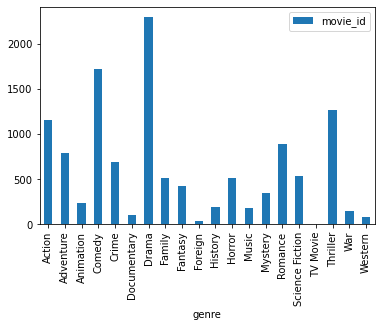

In [101]:
genre_count.plot(kind='bar')

In [102]:
genre_by_revenue = movies_financials_taglines_genres.groupby('genre')['revenue'].mean()
genre_by_revenue 

genre
Action             1.768149e+08
Adventure          2.476065e+08
Animation          2.789174e+08
Comedy             1.084794e+08
Crime              8.790254e+07
Documentary        2.583116e+07
Drama              8.196813e+07
Family             2.258299e+08
Fantasy            2.383164e+08
Foreign            3.951528e+05
History            7.791728e+07
Horror             6.772722e+07
Music              7.906381e+07
Mystery            1.020739e+08
Romance            9.256247e+07
Science Fiction    1.887708e+08
TV Movie                    NaN
Thriller           1.101877e+08
War                1.007787e+08
Western            6.577245e+07
Name: revenue, dtype: float64

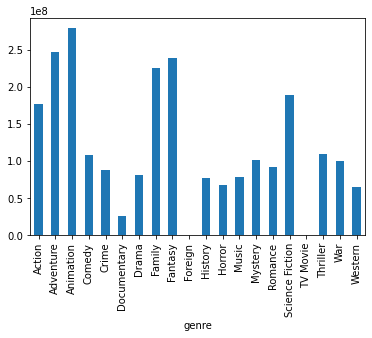

In [103]:
genre_by_revenue.plot(kind='bar')

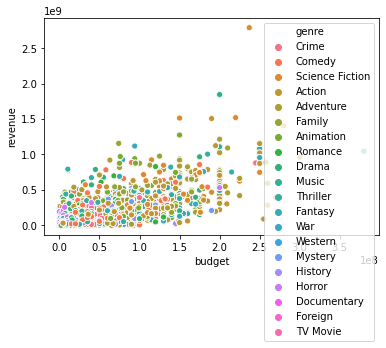

In [104]:
sns.scatterplot(data=movies_financials_taglines_genres, x='budget',y='revenue', hue='genre')

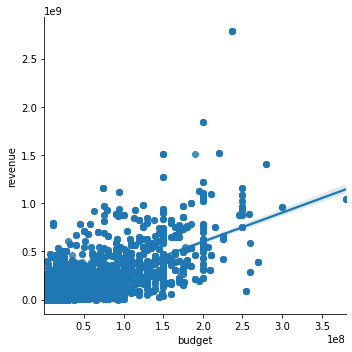

In [105]:
sns.lmplot(data=movies_financials_taglines_genres, x='budget',y='revenue')

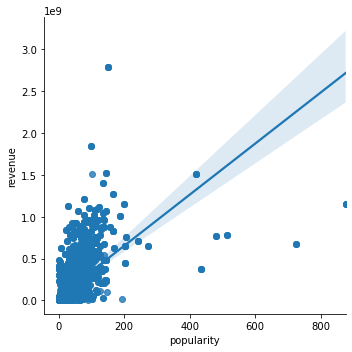

In [106]:
sns.lmplot(data=movies_financials_taglines_genres, x='popularity',y='revenue')

### Merging a table to itself
----

In [107]:
sequel_data= open('/Users/hyunjung/Desktop/DataCamp/data/sequels.p','rb')
sequel= pickle.load(sequel_data)
sequel.head()

,id,title,sequel
0,19995,Avatar,<NA>
1,862,Toy Story,863
2,863,Toy Story 2,10193
3,597,Titanic,<NA>
4,24428,The Avengers,<NA>


In [108]:
original_sequels = sequel.merge(sequel, left_on='sequel', right_on='id', suffixes=['_org','_seq'])
original_sequels

,id_org,title_org,sequel_org,id_seq,title_seq,sequel_seq
0,862,Toy Story,863,863,Toy Story 2,10193
1,863,Toy Story 2,10193,10193,Toy Story 3,<NA>
2,675,Harry Potter and the Order of the Phoenix,767,767,Harry Potter and the Half-Blood Prince,<NA>
3,121,The Lord of the Rings: The Two Towers,122,122,The Lord of the Rings: The Return of the King,<NA>
4,120,The Lord of the Rings: The Fellowship of the Ring,121,121,The Lord of the Rings: The Two Towers,122
...,...,...,...,...,...,...
85,76,Before Sunrise,80,80,Before Sunset,132344
86,2292,Clerks,2295,2295,Clerks II,<NA>
87,9367,El Mariachi,8068,8068,Desperado,1428
88,8374,The Boondock Saints,22821,22821,The Boondock Saints II: All Saints Day,<NA>


In [109]:
original_sequels = original_sequels[['id_org','title_org','title_seq']]
original_sequels.head()

,id_org,title_org,title_seq
0,862,Toy Story,Toy Story 2
1,863,Toy Story 2,Toy Story 3
2,675,Harry Potter and the Order of the Phoenix,Harry Potter and the Half-Blood Prince
3,121,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Return of the King
4,120,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Two Towers


In [123]:
original_sequels_2 = original_sequels.merge(original_sequels, how='outer', left_on='title_seq', right_on='title_org', suffixes=['_2','_3'])
original_sequels_2

,id_org_2,title_org_2,title_seq_2,id_org_3,title_org_3,title_seq_3
0,862,Toy Story,Toy Story 2,863,Toy Story 2,Toy Story 3
1,863,Toy Story 2,Toy Story 3,<NA>,NaN,NaN
2,675,Harry Potter and the Order of the Phoenix,Harry Potter and the Half-Blood Prince,<NA>,NaN,NaN
3,121,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Return of the King,<NA>,NaN,NaN
4,120,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Two Towers,121,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Return of the King
...,...,...,...,...,...,...
160,<NA>,NaN,NaN,76,Before Sunrise,Before Sunset
161,<NA>,NaN,NaN,2292,Clerks,Clerks II
162,<NA>,NaN,NaN,9367,El Mariachi,Desperado
163,<NA>,NaN,NaN,8374,The Boondock Saints,The Boondock Saints II: All Saints Day


In [126]:
original_sequels_2 = original_sequels_2.drop(columns=['title_seq_2','id_org_3'])

KeyError: "['title_seq_2' 'id_org_3'] not found in axis"

In [127]:
original_sequels_2.head()

,id_org_2,title_org_2,title_org_3,title_seq_3
0,862,Toy Story,Toy Story 2,Toy Story 3
1,863,Toy Story 2,NaN,NaN
2,675,Harry Potter and the Order of the Phoenix,NaN,NaN
3,121,The Lord of the Rings: The Two Towers,NaN,NaN
4,120,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Return of the King


In [129]:
original_sequels_2= original_sequels_2.rename(columns={'id_org_2':'Original ID','title_org_2':'1st title','title_org_3':'2nd title','title_seq_3':'3rd title'})

### Merging on Indexes
---

In [110]:
movies_financials_taglines_genres

,movie_id,genre,title,popularity,release_date,budget,revenue,tagline
0,5.0,Crime,Four Rooms,22.876230,1995-12-09,4000000.0,4300000.0,Twelve outrageous guests. Four scandalous requ...
1,5.0,Comedy,Four Rooms,22.876230,1995-12-09,4000000.0,4300000.0,Twelve outrageous guests. Four scandalous requ...
2,11.0,Science Fiction,Star Wars,126.393695,1977-05-25,11000000.0,775398007.0,"A long time ago in a galaxy far, far away..."
3,11.0,Action,Star Wars,126.393695,1977-05-25,11000000.0,775398007.0,"A long time ago in a galaxy far, far away..."
4,11.0,Adventure,Star Wars,126.393695,1977-05-25,11000000.0,775398007.0,"A long time ago in a galaxy far, far away..."
...,...,...,...,...,...,...,...,...
12183,NaN,NaN,The Blood of My Brother: A Story of Death in Iraq,0.005256,2005-11-25,NaN,NaN,NaN
12184,NaN,NaN,Hum To Mohabbat Karega,0.001186,2000-05-26,NaN,NaN,NaN
12185,NaN,NaN,The Big Swap,0.627763,1998-06-11,NaN,NaN,NaN
12186,NaN,NaN,The Algerian,0.025364,2015-08-07,NaN,NaN,NaN


In [111]:
movies.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [112]:
movies.set_index('id', inplace=True)

In [113]:
movies_sequls= movies.merge(original_sequels, left_on='id', right_on='id_org', how='left')

In [114]:
movies_sequls.head()

,title,popularity,release_date,id_org,title_org,title_seq
0,Oliver Twist,20.415572,2005-09-23,<NA>,NaN,NaN
1,Better Luck Tomorrow,3.877036,2002-01-12,<NA>,NaN,NaN
2,Grown Ups,38.864027,2010-06-24,<NA>,NaN,NaN
3,Infamous,3.680896,2006-11-16,<NA>,NaN,NaN
4,Alpha and Omega,12.300789,2010-09-17,<NA>,NaN,NaN


In [115]:
movies_sequls.drop(columns=['id_org','title_org'],inplace=True)

In [116]:
movies_sequls.rename(columns={'title_seq':'sequel_title'}, inplace=True)

In [117]:
cast_file = open('/Users/hyunjung/Desktop/DataCamp/data/casts.p','rb')
casts = pickle.load(cast_file)
casts.head()

,movie_id,cast_id,character,gender,id,name
7,5,22,Jezebel,1,3122,Sammi Davis
8,5,23,Diana,1,3123,Amanda de Cadenet
9,5,24,Athena,1,3124,Valeria Golino
3,5,25,Elspeth,1,3125,Madonna
12,5,26,Eva,1,3126,Ione Skye


In [118]:
casts= casts.set_index(['movie_id','cast_id'])
casts

character  gender       id               name
movie_id cast_id                                              
5        22        Jezebel       1     3122        Sammi Davis
         23          Diana       1     3123  Amanda de Cadenet
         24         Athena       1     3124     Valeria Golino
         25        Elspeth       1     3125            Madonna
         26            Eva       1     3126          Ione Skye
...                    ...     ...      ...                ...
433715   3           Amber       0  1500111      Nicole Smolen
         4              BB       0  1734573        Kim Baldwin
         5           Sugar       0  1734574    Ariana Stephens
         6            Drew       0  1734575        Bryson Funk
459488   0        Narrator       0  1354401    Tony Oppedisano

[106257 rows x 4 columns]

In [119]:
movies_financials_taglines_genres.pivot_table(index=['movie_id','title'],aggfunc={'genre':'sum'})

,,genre
movie_id,title,
5.0,Four Rooms,CrimeComedy
11.0,Star Wars,Science FictionActionAdventure
12.0,Finding Nemo,FamilyAnimation
13.0,Forrest Gump,ComedyRomanceDrama
14.0,American Beauty,Drama
...,...,...
426067.0,Midnight Cabaret,Horror
426469.0,Growing Up Smith,ComedyFamilyDrama
433715.0,8 Days,ThrillerDrama


In [120]:
movies

,title,popularity,release_date
id,,,
257,Oliver Twist,20.415572,2005-09-23
14290,Better Luck Tomorrow,3.877036,2002-01-12
38365,Grown Ups,38.864027,2010-06-24
9672,Infamous,3.680896,2006-11-16
12819,Alpha and Omega,12.300789,2010-09-17
...,...,...,...
3089,Red River,5.344815,1948-08-26
11934,The Hudsucker Proxy,14.188982,1994-03-11
13807,Exiled,8.486390,2006-09-06


In [121]:
genres.set_index('movie_id')

,genre
movie_id,
5,Crime
5,Comedy
11,Science Fiction
11,Action
11,Adventure
...,...
426469,Drama
433715,Thriller
433715,Drama


## Merge_Ordered()
----
<Method Comparison>
1. .merge() method:
    - colunm(s) to join on parameters: on=, left_on=, right_on=
    - Types of join: how= 'left','right','outer','inner', default= <strong>inner</strong>
    - Overlapping column names: suffixes=[]
    - Calling the method: <strong>df1.merge(df2)</strong>

2. .merge_ordered() method:
    - colunm(s) to join on parameters: on=, left_on=, right_on=
    - Types of join: how= 'left','right','outer','inner', default= <strong>outer</strong>
    - Overlapping column names: suffixes=[]
    - Calling the function: <strong>pd.merge_ordered(df,df2)</strong>

3. When to use merge_ordered()?
    - Ordered data/ time series
    - Filling in missing values: fill_method= 'ffill': fills missing with previous value

## Financial dataset
----

In [133]:
sp500_df = pd.read_csv('/Users/hyunjung/Desktop/DataCamp/data/S&P500.csv')
sp500_df

,Date,Returns
0,2008,-38.49
1,2009,23.45
2,2010,12.78
3,2011,0.00
4,2012,13.41
5,2014,11.39
6,2015,-0.73
7,2016,9.54
8,2017,19.42
9,2013,29.60


In [134]:
wb_pop = pd.read_csv('/Users/hyunjung/Desktop/DataCamp/data/WorldBank_POP.csv')
wb_gdp = pd.read_csv('/Users/hyunjung/Desktop/DataCamp/data/WorldBank_GDP.csv')

In [141]:
wb_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    2640 non-null   object 
 1   Country Code    2640 non-null   object 
 2   Indicator Name  2640 non-null   object 
 3   Year            2640 non-null   int64  
 4   Pop             2622 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 103.2+ KB


In [142]:
wb_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    40 non-null     object 
 1   Country Code    40 non-null     object 
 2   Indicator Name  40 non-null     object 
 3   Year            40 non-null     int64  
 4   GDP             40 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.7+ KB


In [138]:
wb_pop_gdp = pd.merge_ordered(wb_pop,wb_gdp, on=['Country Name','Country Code'], suffixes=['_pop','_gdp'])

In [139]:
wb_pop_gdp.head()

,Country Name,Country Code,Indicator Name_pop,Year_pop,Pop,Indicator Name_gdp,Year_gdp,GDP
0,Afghanistan,AFG,"Population, total",2010,29185507.0,NaN,NaN,NaN
1,Afghanistan,AFG,"Population, total",2011,30117413.0,NaN,NaN,NaN
2,Afghanistan,AFG,"Population, total",2012,31161376.0,NaN,NaN,NaN
3,Afghanistan,AFG,"Population, total",2012,31161376.0,NaN,NaN,NaN
4,Afghanistan,AFG,"Population, total",2013,32269589.0,NaN,NaN,NaN


In [140]:
wb_pop_gdp.isnull().sum()

Country Name             0
Country Code             0
Indicator Name_pop       0
Year_pop                 0
Pop                     18
Indicator Name_gdp    2600
Year_gdp              2600
GDP                   2600
dtype: int64

In [143]:
sp500_df

,Date,Returns
0,2008,-38.49
1,2009,23.45
2,2010,12.78
3,2011,0.00
4,2012,13.41
5,2014,11.39
6,2015,-0.73
7,2016,9.54
8,2017,19.42
9,2013,29.60


In [148]:
wb_gdp.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Year', 'GDP'], dtype='object')

In [149]:
gdp_sp500 = pd.merge_ordered(wb_gdp, sp500_df, how='left', right_on='Date',left_on='Year')
gdp_sp500

,Country Name,Country Code,Indicator Name,Year,GDP,Date,Returns
0,China,CHN,GDP (current US$),2010,6.087160e+12,2010.0,12.78
1,Germany,DEU,GDP (current US$),2010,3.417090e+12,2010.0,12.78
2,Japan,JPN,GDP (current US$),2010,5.700100e+12,2010.0,12.78
3,United States,USA,GDP (current US$),2010,1.499210e+13,2010.0,12.78
4,China,CHN,GDP (current US$),2011,7.551500e+12,2011.0,0.00
5,Germany,DEU,GDP (current US$),2011,3.757700e+12,2011.0,0.00
6,Japan,JPN,GDP (current US$),2011,6.157460e+12,2011.0,0.00
7,United States,USA,GDP (current US$),2011,1.554260e+13,2011.0,0.00
8,China,CHN,GDP (current US$),2012,8.532230e+12,2012.0,13.41
9,Germany,DEU,GDP (current US$),2012,3.543980e+12,2012.0,13.41


In [150]:
wb_pop_gdp.columns

Index(['Country Name', 'Country Code', 'Indicator Name_pop', 'Year_pop', 'Pop',
       'Indicator Name_gdp', 'Year_gdp', 'GDP'],
      dtype='object')

In [151]:
wb_pop_gdp.drop_duplicates(subset='Country Name', inplace=True)

In [152]:
wb_pop_gdp.head()

,Country Name,Country Code,Indicator Name_pop,Year_pop,Pop,Indicator Name_gdp,Year_gdp,GDP
0,Afghanistan,AFG,"Population, total",2010,29185507.0,NaN,NaN,NaN
10,Albania,ALB,"Population, total",2010,2913021.0,NaN,NaN,NaN
20,Algeria,DZA,"Population, total",2010,35977455.0,NaN,NaN,NaN
30,American Samoa,ASM,"Population, total",2010,56079.0,NaN,NaN,NaN
40,Andorra,AND,"Population, total",2010,84449.0,NaN,NaN,NaN


In [153]:
wb_pop_gdp['Year_pop'].unique()

array([2010])

In [156]:
no_info_gdp = wb_pop_gdp[wb_pop_gdp['GDP'].isnull()]

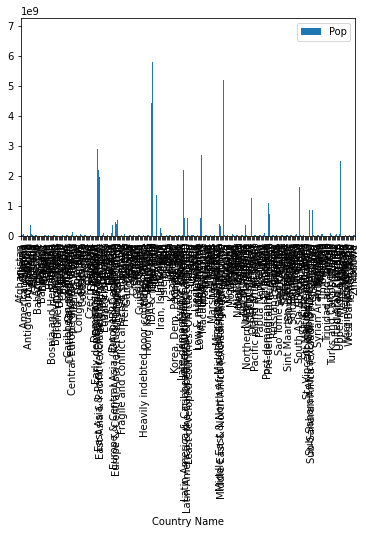

In [160]:
no_info_gdp.plot(kind='bar',x='Country Name',y='Pop')

## Using merge_asof()
----
1. Similar to a merge_ordered() left-join: similar features as merge_ordered()
2. Match on the nearest key column and <strong>not exact</strong> matches: Merge <strong>on</strong> columns must be sorted
3. When to use merge_asof():
    - Data sampled from a process
    - Developing a training set. aka no data leakage

## Selecting data with .query():
----
1. .query('Statement')
2. Accepts an input string
    - input string used to determine what <strong>rows</strong> are returned
    - input string similar to statement after WHERE clause in SQL statement

In [170]:
gdp_sp500.query('Year >2016')

,Country Name,Country Code,Indicator Name,Year,GDP,Date,Returns
32,China,CHN,GDP (current US$),2017,1.214350e+13,2017.0,19.42
33,Germany,DEU,GDP (current US$),2017,3.693200e+12,2017.0,19.42
34,Japan,JPN,GDP (current US$),2017,4.859950e+12,2017.0,19.42
35,United States,USA,GDP (current US$),2017,1.948540e+13,2017.0,19.42
36,China,CHN,GDP (current US$),2018,1.360820e+13,NaN,NaN
37,Germany,DEU,GDP (current US$),2018,3.996760e+12,NaN,NaN
38,Japan,JPN,GDP (current US$),2018,4.970920e+12,NaN,NaN
39,United States,USA,GDP (current US$),2018,2.049410e+13,NaN,NaN


In [174]:
gdp_sp500.query('Year <2016 and Year >2014')

,Country Name,Country Code,Indicator Name,Year,GDP,Date,Returns
24,China,CHN,GDP (current US$),2015,1.101550e+13,2015.0,-0.73
25,Germany,DEU,GDP (current US$),2015,3.381390e+12,2015.0,-0.73
26,Japan,JPN,GDP (current US$),2015,4.389480e+12,2015.0,-0.73
27,United States,USA,GDP (current US$),2015,1.821930e+13,2015.0,-0.73


In [181]:
gdp_sp500.query('"Country Code" == "USA" or Year >2016')

,Country Name,Country Code,Indicator Name,Year,GDP,Date,Returns
32,China,CHN,GDP (current US$),2017,1.214350e+13,2017.0,19.42
33,Germany,DEU,GDP (current US$),2017,3.693200e+12,2017.0,19.42
34,Japan,JPN,GDP (current US$),2017,4.859950e+12,2017.0,19.42
35,United States,USA,GDP (current US$),2017,1.948540e+13,2017.0,19.42
36,China,CHN,GDP (current US$),2018,1.360820e+13,NaN,NaN
37,Germany,DEU,GDP (current US$),2018,3.996760e+12,NaN,NaN
38,Japan,JPN,GDP (current US$),2018,4.970920e+12,NaN,NaN
39,United States,USA,GDP (current US$),2018,2.049410e+13,NaN,NaN


In [182]:
movie

,title,popularity,release_date,sequel_title
0,Oliver Twist,20.415572,2005-09-23,NaN
1,Better Luck Tomorrow,3.877036,2002-01-12,NaN
2,Grown Ups,38.864027,2010-06-24,NaN
3,Infamous,3.680896,2006-11-16,NaN
4,Alpha and Omega,12.300789,2010-09-17,NaN
...,...,...,...,...
4798,Red River,5.344815,1948-08-26,NaN
4799,The Hudsucker Proxy,14.188982,1994-03-11,NaN
4800,Exiled,8.486390,2006-09-06,NaN
4801,Albert Nobbs,7.802245,2011-12-21,NaN


In [183]:
original_sequels_2

,Original ID,1st title,2nd title,3rd title
0,862,Toy Story,Toy Story 2,Toy Story 3
1,863,Toy Story 2,NaN,NaN
2,675,Harry Potter and the Order of the Phoenix,NaN,NaN
3,121,The Lord of the Rings: The Two Towers,NaN,NaN
4,120,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Return of the King
...,...,...,...,...
160,<NA>,NaN,Before Sunrise,Before Sunset
161,<NA>,NaN,Clerks,Clerks II
162,<NA>,NaN,El Mariachi,Desperado
163,<NA>,NaN,The Boondock Saints,The Boondock Saints II: All Saints Day


In [191]:
movies_financials.query('popularity > 30 and revenue > budget *100')

,id,title,popularity,release_date,budget,revenue
118,3170,Bambi,47.651878,1942-08-14,858000.0,267447150.0
750,2667,The Blair Witch Project,41.690578,1999-07-14,60000.0,248000000.0
1243,9659,Mad Max,33.142185,1979-04-12,400000.0,100000000.0
1477,770,Gone with the Wind,48.982550,1939-12-15,4000000.0,400176459.0
3469,408,Snow White and the Seven Dwarfs,80.171283,1937-12-20,1488423.0,184925486.0
3736,1366,Rocky,72.198080,1976-11-21,1000000.0,117235147.0
4069,948,Halloween,30.301307,1978-10-25,300000.0,70000000.0
4199,23827,Paranormal Activity,47.456823,2007-09-14,15000.0,193355800.0


## Reshaping data with .melt()
----
<Wide versus Long data>
    - melt method will allow us to unpivot the dataset

In [194]:
movies_financials_tall = movies_financials.melt(id_vars=['id','title'])
movies_financials_tall.head(10)

,id,title,variable,value
0,257,Oliver Twist,popularity,20.4156
1,14290,Better Luck Tomorrow,popularity,3.87704
2,38365,Grown Ups,popularity,38.864
3,9672,Infamous,popularity,3.6809
4,12819,Alpha and Omega,popularity,12.3008
5,49529,John Carter,popularity,43.927
6,75638,Red Lights,popularity,22.7482
7,13785,Best in Show,popularity,10.9823
8,20024,The End of the Affair,popularity,6.92126
9,18841,The Lost Skeleton of Cadavra,popularity,1.68053


In [196]:
movies_financials_tall.tail(10)

,id,title,variable,value
19202,198370,Mutual Friends,revenue,NaN
19203,116613,The Sweeney,revenue,6.29416e+06
19204,64682,The Great Gatsby,revenue,3.5104e+08
19205,869,Planet of the Apes,revenue,3.62212e+08
19206,12281,Mean Creek,revenue,603943
19207,3089,Red River,revenue,9.012e+06
19208,11934,The Hudsucker Proxy,revenue,NaN
19209,13807,Exiled,revenue,NaN
19210,73873,Albert Nobbs,revenue,5.63483e+06
19211,11622,Blast from the Past,revenue,4.0263e+07


In [195]:
movies_financials.melt(id_vars=['title','popularity'])

,title,popularity,variable,value
0,Oliver Twist,20.415572,id,257
1,Better Luck Tomorrow,3.877036,id,14290
2,Grown Ups,38.864027,id,38365
3,Infamous,3.680896,id,9672
4,Alpha and Omega,12.300789,id,12819
...,...,...,...,...
19207,Red River,5.344815,revenue,9.012e+06
19208,The Hudsucker Proxy,14.188982,revenue,NaN
19209,Exiled,8.486390,revenue,NaN
19210,Albert Nobbs,7.802245,revenue,5.63483e+06


In [205]:
movies_financials_taglines_genres.melt(id_vars=['movie_id','title'],value_vars='genre')

,movie_id,title,variable,value
0,5.0,Four Rooms,genre,Crime
1,5.0,Four Rooms,genre,Comedy
2,11.0,Star Wars,genre,Science Fiction
3,11.0,Star Wars,genre,Action
4,11.0,Star Wars,genre,Adventure
...,...,...,...,...
12183,NaN,The Blood of My Brother: A Story of Death in Iraq,genre,NaN
12184,NaN,Hum To Mohabbat Karega,genre,NaN
12185,NaN,The Big Swap,genre,NaN
12186,NaN,The Algerian,genre,NaN


In [207]:
movies_financials_taglines_genres.columns

Index(['movie_id', 'genre', 'title', 'popularity', 'release_date', 'budget',
       'revenue', 'tagline'],
      dtype='object')

In [208]:
movies_financials_taglines_genres.melt(id_vars=['movie_id'], value_vars=['genre', 'title', 'popularity', 'release_date', 'budget',
       'revenue', 'tagline'])

,movie_id,variable,value
0,5.0,genre,Crime
1,5.0,genre,Comedy
2,11.0,genre,Science Fiction
3,11.0,genre,Action
4,11.0,genre,Adventure
...,...,...,...
85311,NaN,tagline,NaN
85312,NaN,tagline,NaN
85313,NaN,tagline,NaN
85314,NaN,tagline,NaN


In [210]:
movies_financials.columns

Index(['id', 'title', 'popularity', 'release_date', 'budget', 'revenue'], dtype='object')

In [216]:
movies_financials_tall= movies_financials.melt(id_vars=['id','title'],value_vars=['release_date'], value_name='release_date')

In [217]:
movies_financials_tall['release_date'].dtype

dtype('O')

In [218]:
movies_financials_tall['release_date'] = pd.to_datetime(movies_financials_tall['release_date'])

In [219]:
from datetime import datetime

In [221]:
movies_financials_tall['release_year'] = movies_financials_tall['release_date'].dt.strftime('%Y')

In [222]:
movies_financials_tall.head()

,id,title,variable,release_date,release_year
0,257,Oliver Twist,release_date,2005-09-23,2005
1,14290,Better Luck Tomorrow,release_date,2002-01-12,2002
2,38365,Grown Ups,release_date,2010-06-24,2010
3,9672,Infamous,release_date,2006-11-16,2006
4,12819,Alpha and Omega,release_date,2010-09-17,2010


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]),
 <a list of 90 Text major ticklabel objects>)

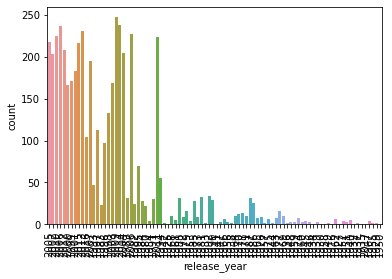

In [224]:
sns.countplot(data= movies_financials_tall, x='release_year')
plt.xticks(rotation=90)

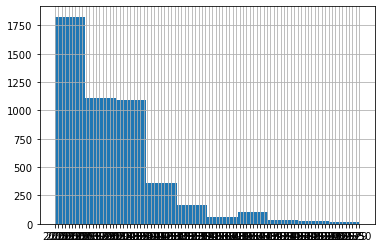

In [226]:
movies_financials_tall['release_year'].hist()

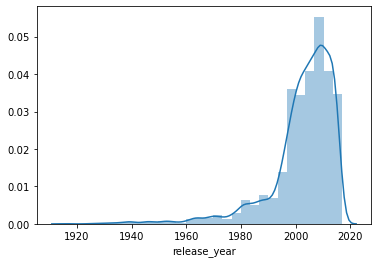

In [230]:
sns.distplot(movies_financials_tall['release_year'], bins= 30)